In [229]:
import numpy as np
import matplotlib.pyplot as plt

In [230]:
def func_value(a, x):
    return np.round(a * x * (1 - x), 8)


def generate_func_values(a, initial_value, range_number):
    x = [func_value(a, initial_value)]
    for i in range(1, range_number):
        x.append(func_value(a, x[i - 1]))
    return x

In [231]:
def generate_sequence(time_series, dimension, delay):
    seq = np.array([time_series[0 : len(time_series) - delay * dimension]])
    if delay * dimension > len(time_series):
        return []
    for i in range(1, dimension):
        seq = np.append(
            seq,
            [time_series[i * delay : len(time_series) - delay * (dimension - i)]],
            axis=0,
        )
    return seq.T

In [232]:
def compute_eig(sequences):
    cov_mat = np.cov(sequences)
    eigv, eigh = np.linalg.eig(cov_mat)
    eigv = np.array(eigv).flatten()
    eigh = np.array(eigh).flatten()
    eig = np.array([eigv, eigv]).flatten()
    return np.round(np.sort(eig, kind="mergesort")[::-1], 8)

In [233]:
def generate_error(eig, dimension):
    return [np.round(np.sqrt(eig[i + 1]), 8) for i in range(dimension)]

In [234]:
a = 2
initial_value = 0.1
range_number = 500
dimension = 100
delay = 1

In [237]:
time_series = generate_func_values(a, initial_value, range_number)
sequences = generate_sequence(time_series, dimension, delay)
eig = compute_eig(sequences)
err = generate_error(eig, dimension)
err

[0.04496009,
 0.00560625,
 0.00560625,
 0.00076158,
 0.00076158,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

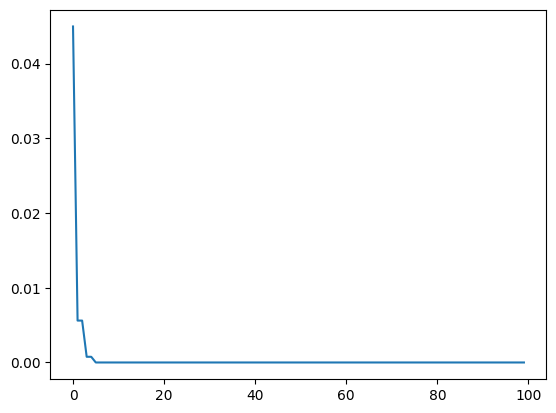

In [236]:
fig, ax = plt.subplots()
ax.plot(np.array(range(dimension)), err)
plt.show()